In [1]:
import numpy as np
import os
import pickle
from scipy import signal
import scipy.io as scio
import ecloMethod as ecloM

# 1 载入数据

In [2]:
filename = os.path.join(os.getcwd(),'datasets')
subList = {}
for sub in os.listdir(filename):
    dateList = []
    subpath = os.path.join(filename, sub)
    for date in os.listdir(subpath):
        getpath = os.path.join(subpath, date)
        with open(getpath, "rb") as fp:
            date_data = pickle.load(fp)
        dateList.append(date_data)
    subList[sub] = dateList

选取被试数据

In [14]:
sub = subList['huangchangxing']
print(len(sub))

3


选取日期并获取强度和刺激

In [15]:
subdict = sub[2]
if subdict['X'].shape[0] == 125:
    frequency = np.arange(3,15.5,0.5)
    intensity = np.array([1])
elif subdict['X'].shape[0] == 120:
    frequency = np.arange(4,16,1)
    intensity = np.arange(0.1,1.1,0.1)
else:
    frequency = np.arange(4,16,1)
    intensity = np.array([0.4,0.7,1])

选取导联

In [16]:
chn_picks = ['OZ','O1','O2','PO5','PZ','PO6','POZ','PO3','PO4']
subeeg = ecloM.getChannels(subdict, chn_picks)

# Evoked method

获取被试alpha值

9.961666666666668

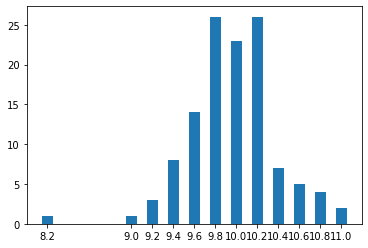

In [17]:
fs = 1000
alpha_t = 2
alphaeeg = subeeg[:,:fs*alpha_t]
alpha = ecloM.getAlpha(alphaeeg, fs)
alpha

block平均

In [18]:
Trigger = subdict['y']
Esubeeg_all = ecloM.Blockmean(subeeg, Trigger)
Esubeeg = Esubeeg_all[:,fs*alpha_t:]

绘制频谱

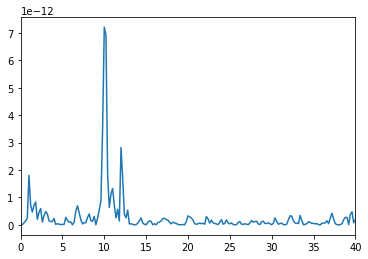

In [21]:
ecloM.EPlotspectrum(Esubeeg, frequency, intensity, freq=12, intens=1, alpha=alpha)

绘制频率热图

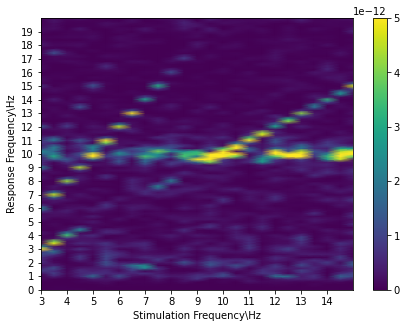

In [24]:
ecloM.EPlotHotmap(Esubeeg, frequency, intensity, intens=1, vmax=5*1e-12)

绘制时频图

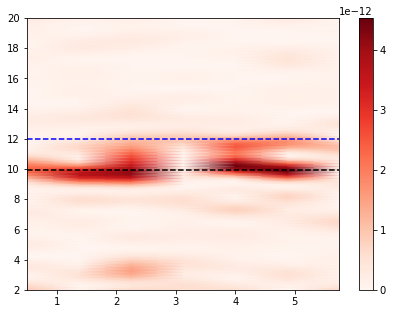

In [25]:
ecloM.EPlotTFR(Esubeeg_all, frequency, intensity, alpha, freq=12, intens=1)

绘制Alpha peak ratio

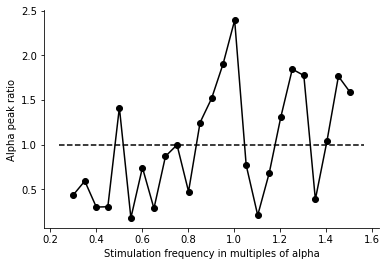

In [26]:
ecloM.EPlotpeakratio(Esubeeg, frequency, intensity, alpha, intens=1)

# Ongoing methods

先求频谱再block平均

In [27]:
fs = 1000
alpha_t = 2
Trigger = subdict['y']
ongoing_f, Osubeeg = ecloM.OngoingP(subeeg[:,fs*alpha_t:], Trigger)

绘制频谱

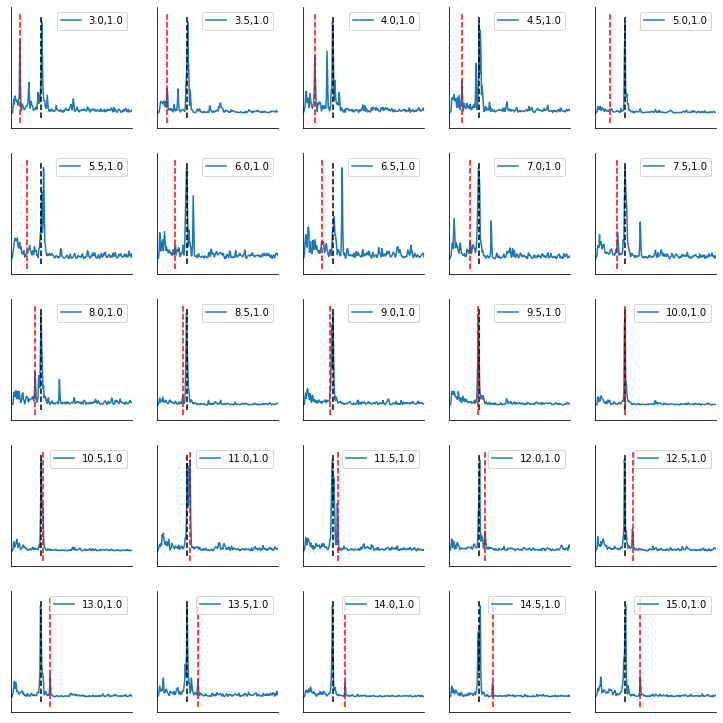

In [28]:
ecloM.OPlotspectrum(ongoing_f, Osubeeg, frequency, intensity, alpha, freq=15, intens=1, all=True)

绘制频率热图

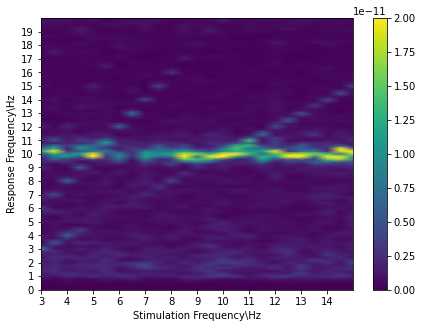

In [32]:
ecloM.OPlotHotmap(ongoing_f, Osubeeg, frequency, intensity, intens=1, vmax=2*1e-11)

绘制时频图

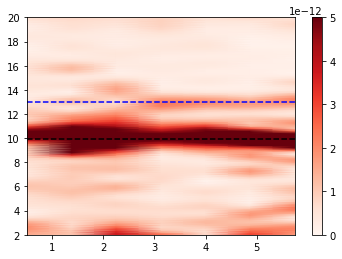

In [39]:
ecloM.OPlotTFR(subeeg, Trigger, frequency, intensity, alpha, freq=13, intens=1, vmax=0.5*1e-11)

绘制Alpha peak ratio

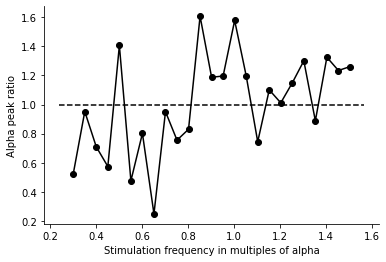

In [40]:
ecloM.OPlotpeakratio(ongoing_f, Osubeeg, frequency, intensity, alpha, intens=1)

# Singletrial

绘制PLV

载入刺激

In [41]:
fs = 1000
alpha_t = 2
Ssubeeg = subeeg[:,fs*alpha_t:]
Trigger = subdict['y']

In [42]:
if len(frequency)*len(intensity) == 25:
    file = os.path.join(os.getcwd(),'stimulation.mat')
    stimulus = scio.loadmat(file)['alti']
    stimulus = signal.resample(stimulus,Ssubeeg.shape[1],axis=1)
    stimulus = np.stack([stimulus[tg-1,:] for tg in Trigger])
else:
    print('The sub-date is invalid.\n')

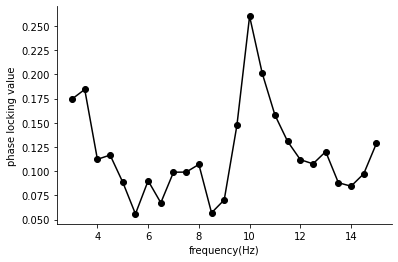

In [43]:
ecloM.SPlotPLV(Ssubeeg, frequency, intensity, Trigger, stimulus)

绘制时频图

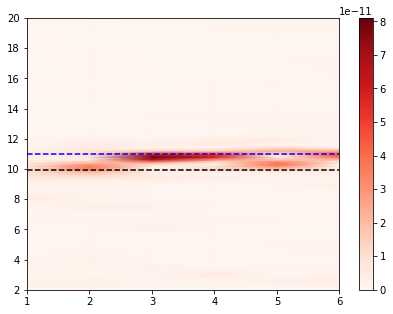

In [48]:
ecloM.SPlotTFR(subeeg, Trigger, frequency, intensity, alpha, freq=11, intens=1, trindex=4)